### Elite Bike Store Dataset 

In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# To silence warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
#importing dataset
bikes = pd.read_csv('bike dataset.csv')

#### Exploring the Dataset

In [17]:
#printing dataset bikes.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,"$40,000.00",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,"$30,000.00",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,"$80,000.00",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,"$70,000.00",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,"$30,000.00",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [19]:
#printing dataset shape
print(bikes.shape)
#There are 1026 rows of data and 13 features

(1026, 13)


In [21]:
#checking dataset info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   object
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: int64(4), object(9)
memory usage: 104.3+ KB


##### Here, we noticed that "Income" is in the wrong data type, so it has to be changed

### EDA - Explorative Data Analysis 

In [32]:
#checking for nulls
bikes.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

##### No null values across the features

In [34]:
#checking for number of duplicated data
bikes.duplicated().sum()

#dropping duplicates
bikes.drop_duplicates(inplace=True)

###### There are 26 duplicated values that would be dropped

In [36]:
#dropping the ID column
bikes.drop('ID', axis=1, inplace=True)

In [38]:
# Fixing income column data type

#removing the $ sign
bikes['Income'] = bikes['Income'].str.replace('$', '')
#removing the comma sign
bikes['Income'] = bikes['Income'].str.replace(',', '')
#changing the data type
bikes['Income'] = bikes['Income'].astype('float32')

In [ ]:
#checking data description
bikes.describe()

#### Key Insights 
- Average income is set at 56360, half of the population have 2 childrens and less.
- Very few people in the population have more than 2 cars with half of the populace having just 1 car
- Average age is 44 years

#### Customer Segmentation

In [45]:
#segmenting customers into income groups
bikes['Income Group'] = pd.cut(x=bikes['Income'], bins=3, labels=['Low Earner', 'Mid Earner', 'High Earner'])
#segmenting customers into age groups
bikes['Age Group'] = pd.cut(x=bikes['Age'], bins=[0,30,60,np.inf], labels=['Under 30', 'Middle Aged', 'Old Aged'])

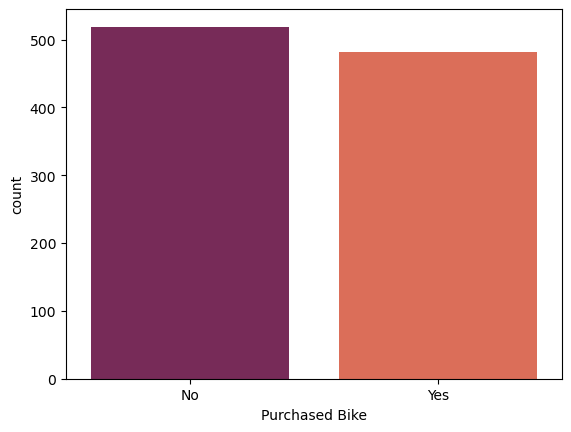

In [47]:
sns.countplot(data=bikes, x='Purchased Bike', palette='rocket')
plt.show()

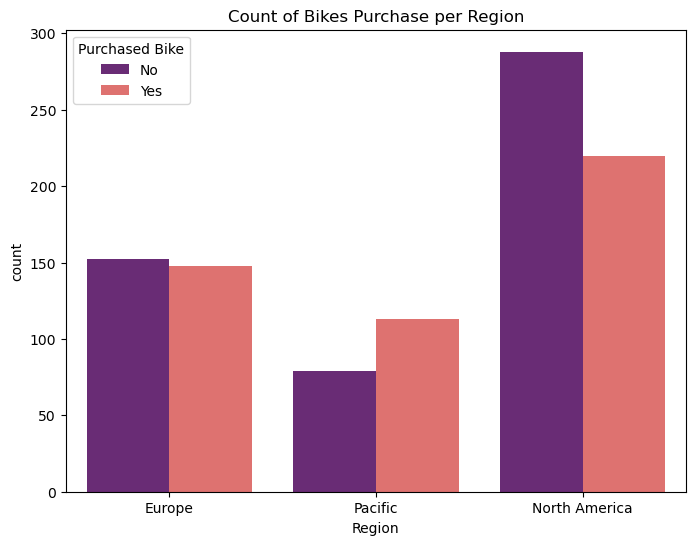

In [49]:
#showing a count of bikes purchased across each region
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Region', hue='Purchased Bike', palette='magma')
plt.title('Count of Bikes Purchase per Region')
plt.show()


#### Key Insights 

- The store has a significantly higher population of customers in the North America region making it the stores largest market audience
- Though North America has a higher number of people who did not purchase bikes, proper marketing campaigns and awareness can help the store see a growth in number of bike purchases in the region
- The Pacific region has the lowest number of customers among the 3 regions, but the number of people who purchased bikes outweigh the number of those who didnt't signifying a possible under developed market
- Raising appropriate awareness in this region can see a good potential for growth in the region
- While Europe has the most stable market amongst the region with almost an equal amount of people who purchased bikes and those who didn't.

In [53]:
#percentage of bike ownership in each region per income group
regional_income = bikes.groupby(['Region', 'Income Group'])['Purchased Bike'].value_counts(normalize=True).reset_index(name='Percentage').sort_values(by=['Region', 'Purchased Bike', 'Percentage'], ascending=[True,True, False])
regional_income['Percentage'] = round(regional_income['Percentage'], 2) * 100


,Region,Income Group,Purchased Bike,Percentage
2,Europe,Mid Earner,No,71.0
1,Europe,Low Earner,No,49.0
5,Europe,High Earner,No,43.0
4,Europe,High Earner,Yes,57.0
0,Europe,Low Earner,Yes,51.0
3,Europe,Mid Earner,Yes,29.0
6,North America,Low Earner,No,60.0
10,North America,High Earner,No,58.0
8,North America,Mid Earner,No,50.0
9,North America,Mid Earner,Yes,50.0


#### Key Insights 
- In Europe majority of bike purchase were made by the high earning income group which accounted for 57% of total bike purchases in that region
- In europe 71% of mid earners did not purchase bikes, while 21% purchased bikes. 49% of low earners did not purchase bikes, while 51% bought bikes. 43% of high earners did not purchase bikes while 57% purchased bikes
- In north america 60% of the low earning population did not purchase bikes while 40% did, also 50% of the mid earning population did not purchase bikes while 50% did, and 58% of the high earing population did not purchase bikes while 42% did
- In pacific region 69% of the high earning income group purchased bikes, followed by 63% of the low earning population in europe 

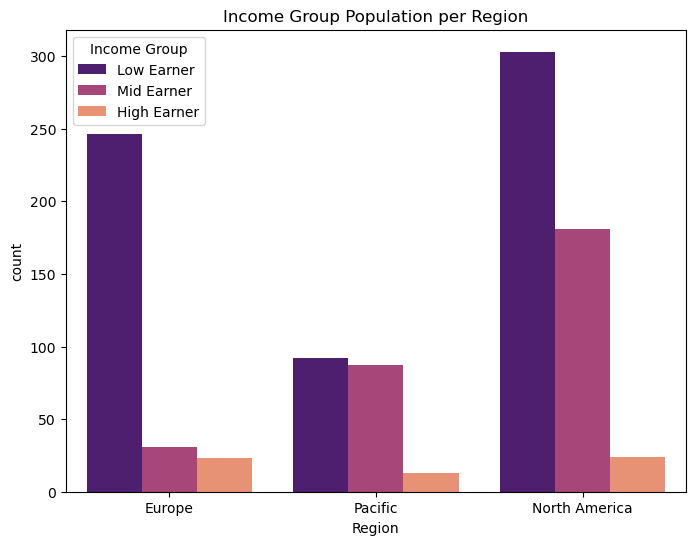

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Region', hue='Income Group', palette='magma')
plt.title('Income Group Population per Region')
plt.show()

##### Key Insights 
- North America has the highest number of low income earners but across each region the number of high income earner is significantly low 
- Only very few population across each region earn significantly, this tells us that the store's dominant income group are the low earners.

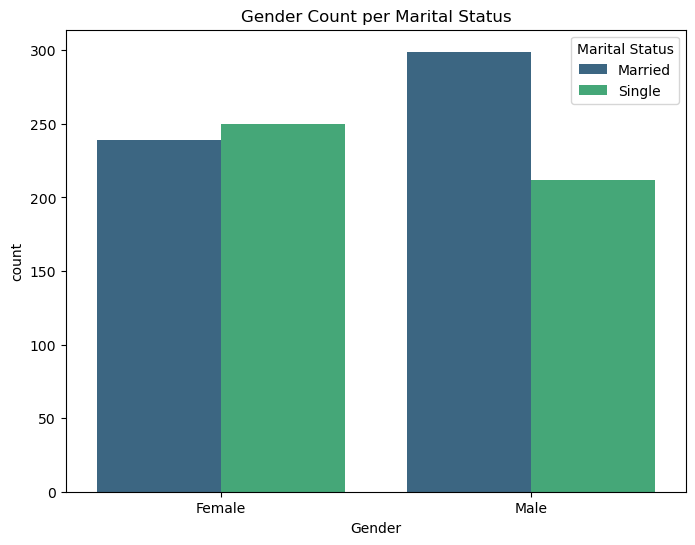

In [64]:
#showing a graphical representation of the gender distribution
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Gender', palette='viridis', hue='Marital Status')
plt.title('Gender Count per Marital Status')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.legend(labels=['Married', 'Single'], title='Marital Status')
plt.show()

##### Key Insights 
- The store has more married male customers followed by single ladies

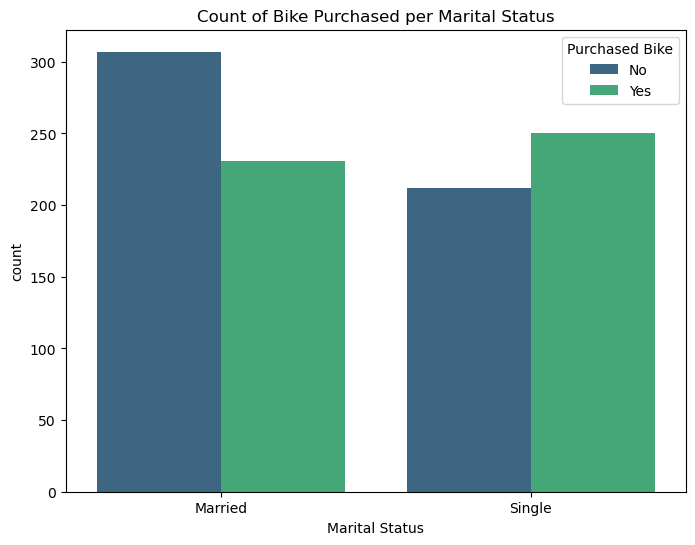

In [66]:
#count of bike purchase per marital status
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Marital Status', hue='Purchased Bike', palette='viridis')
plt.title('Count of Bike Purchased per Marital Status')
plt.xticks(ticks=[0,1], labels=['Married', 'Single'])
plt.show()

##### Key Insights
- Amongst the single customers, more people purchased a bike while amongst the married we have a lot of people who did not purchase a bike

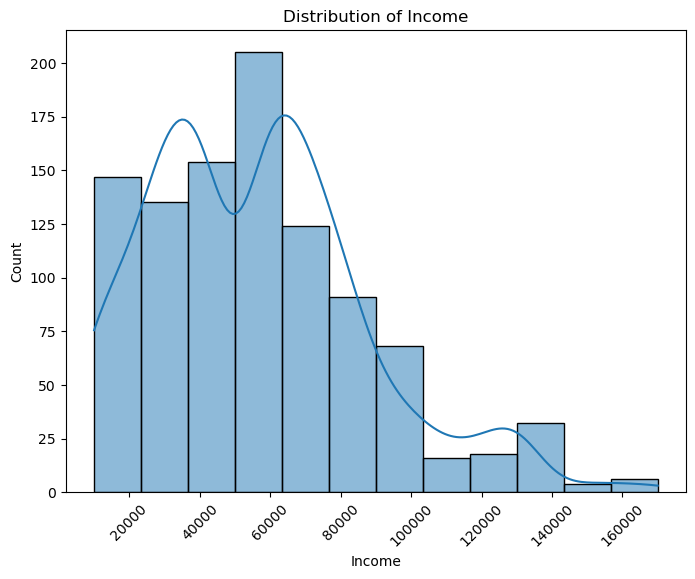

In [69]:
# Showing a distribution of income
plt.figure(figsize=(8,6))
sns.histplot(data=bikes, x='Income', bins=12, kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of Income')
plt.show()

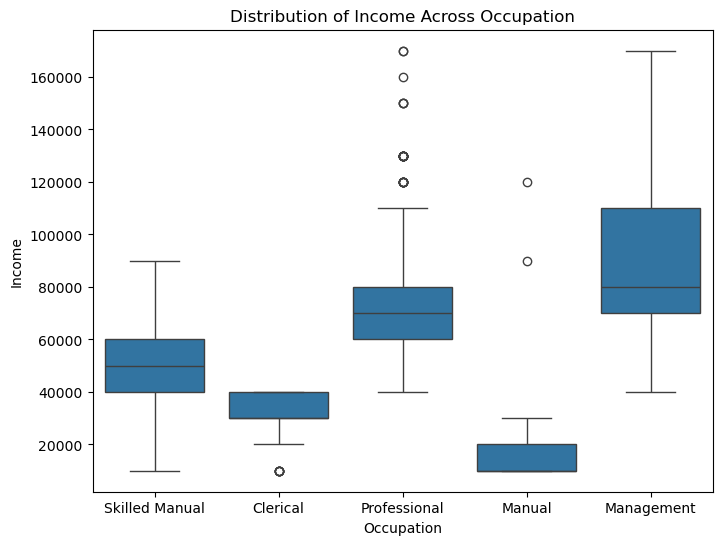

In [71]:
#boxplot of income across each occupation
plt.figure(figsize=(8,6))
sns.boxplot(data=bikes, x='Occupation', y='Income')
plt.title('Distribution of Income Across Occupation')
plt.show()

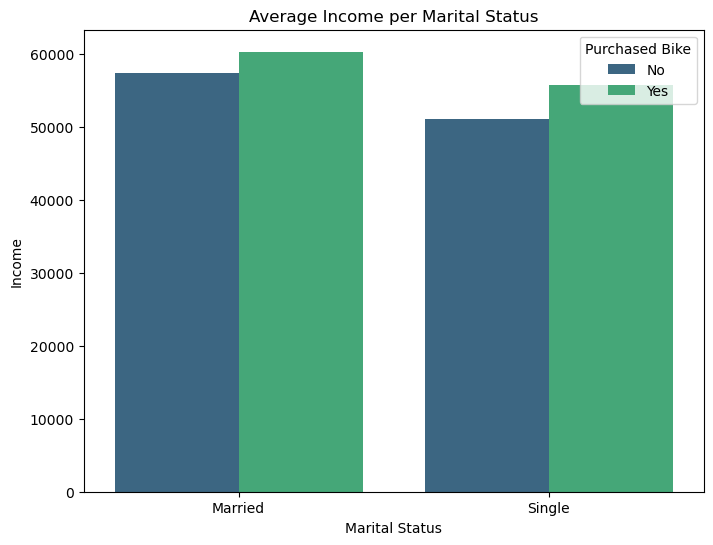

In [76]:
#average income per marital status
plt.figure(figsize=(8,6))
sns.barplot(data=bikes, x='Marital Status', y='Income', palette='viridis', errorbar=None, hue='Purchased Bike')
plt.title('Average Income per Marital Status')
plt.xticks(ticks=[0,1], labels=['Married', 'Single'])
plt.show()

##### Key Insights
- Across both marital status, individuals married or single who purchased bikes have a higher average income compared to those who didn't.

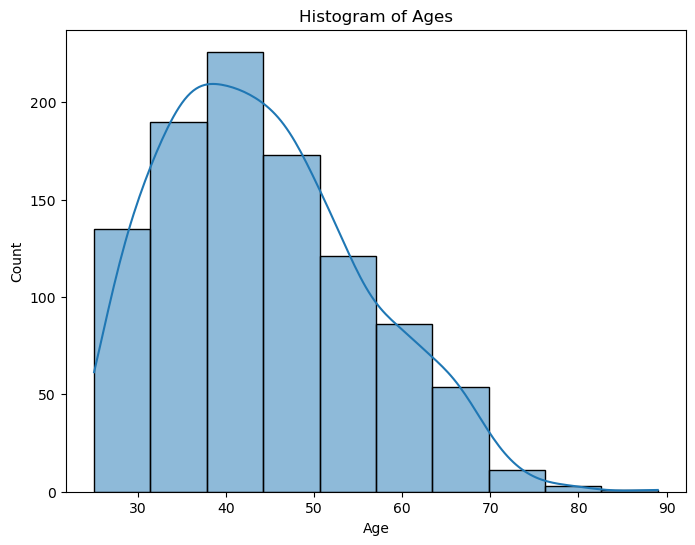

In [78]:
#histogram distribution of ages
plt.figure(figsize=(8,6))
sns.histplot(data=bikes, x='Age', kde=True, bins=10)
plt.title('Histogram of Ages')
plt.show()

In [80]:
#creating a new feature to identify people who own cars.
bikes['Owned Cars'] = np.where(bikes['Cars'] >= 1, 'Yes', 'No')

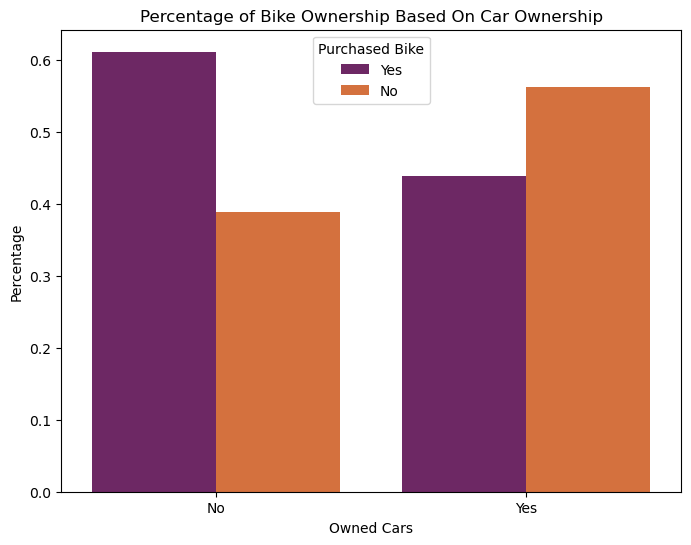

In [82]:
#Percentage of bike owners among car owners
#Grouping the data
bkg= bikes.groupby('Owned Cars')['Purchased Bike'].value_counts(normalize=True).reset_index(name='Percentage')
#creating the barplot
plt.figure(figsize=(8,6))
sns.barplot(data=bkg, x='Owned Cars', y='Percentage', hue='Purchased Bike', palette='inferno')
plt.title('Percentage of Bike Ownership Based On Car Ownership')
plt.show()

##### Key Insights 
- 61% of people who do not own a car own a bike while 43% of people who own a car purchased a bike.
- Promotional efforts should be targeted towards people who do not own cars

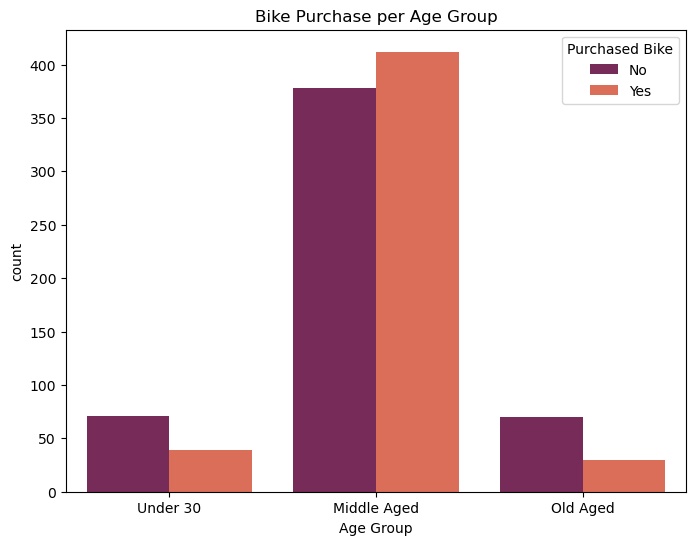

In [88]:
#Bike purchase based on customer age group
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Age Group', palette='rocket', hue='Purchased Bike')
plt.title('Bike Purchase per Age Group')
plt.show()

###### Key Insights 
- a huge number of the store's customer base are within the age range of 30 to 60 and they purchase bikes the most compared to other age groups.

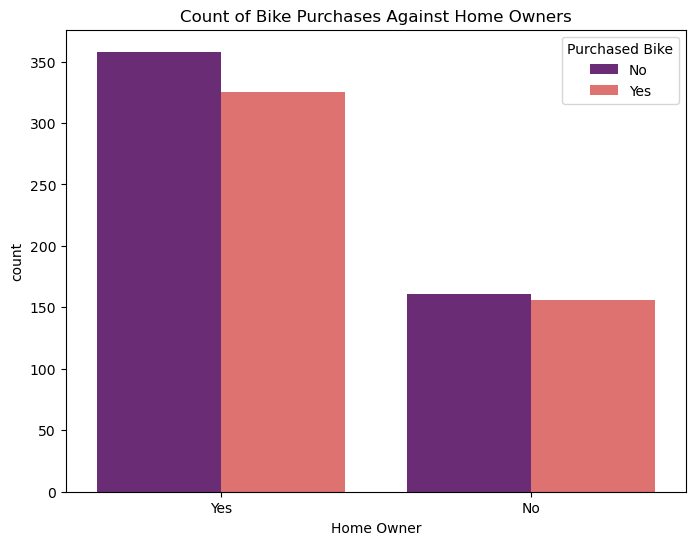

In [96]:
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Home Owner', hue='Purchased Bike', palette='magma')
plt.title('Count of Bike Purchases Against Home Owners')
plt.show()

##### Key Insights 
- A higher percentage of home owners do not purchase bikes compared to those who do are not home owners

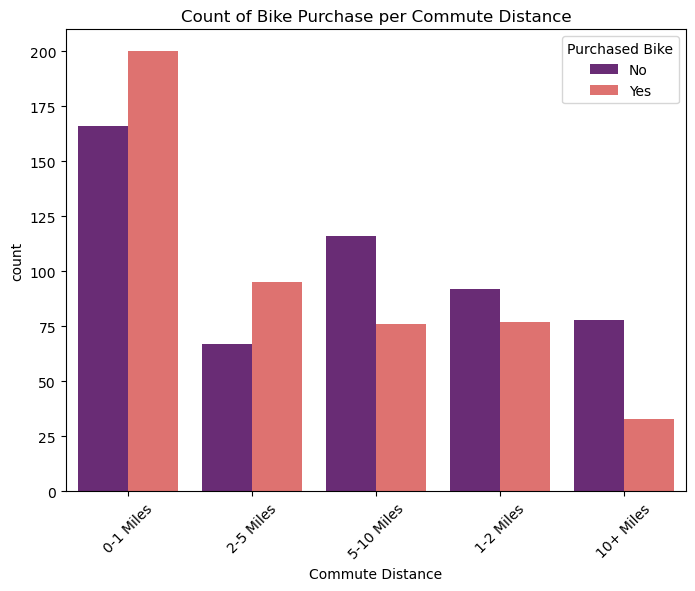

In [94]:
#showing commute distances bike purchase
plt.figure(figsize=(8,6))
sns.countplot(data=bikes, x='Commute Distance', palette='magma', hue='Purchased Bike')
plt.title('Count of Bike Purchase per Commute Distance')
plt.xticks(rotation=45)
plt.show()

##### Key Insights 
- People who commute 0-1 miles purchased the most bikes followed by those commuting a distance of 2-5 miles

In [98]:
#identifying and cleaning outliers
#creating a function to treat outliers
def outlier_cleanse(data, column):
    if data[column].dtype in ['O', 'category']:
        raise TypeError ('Wrong datatype: Column contains a str or categorical data')
    else:
        try:
            p25, p75 = np.percentile(data[column], [25, 75])
            iqr = p75 - p25
            lower_bound = p25 - 1.5 * iqr
            upper_bound = p75 + 1.5 * iqr
            no_outlier = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
            return no_outlier
        except TypeError as e:
            print(e)

In [102]:
# Cleaning the income and age column
bikes = outlier_cleanse(bikes, 'Income')
bikes = outlier_cleanse(bikes, 'Age')

bikes

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Income Group,Age Group,Owned Cars
0,M,F,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,Low Earner,Middle Aged,No
1,M,M,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,Low Earner,Middle Aged,Yes
2,M,M,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,Mid Earner,Middle Aged,Yes
3,S,M,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,Mid Earner,Middle Aged,Yes
4,S,M,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,Low Earner,Middle Aged,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,M,60000.0,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes,Low Earner,Middle Aged,Yes
996,S,M,70000.0,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes,Mid Earner,Middle Aged,No
997,M,M,60000.0,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes,Low Earner,Middle Aged,No
998,S,M,100000.0,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No,Mid Earner,Middle Aged,Yes


In [ ]:
# Feature engineering
bikes['Has_Kids'] = np.where(bikes['Children'] >= 1, 1, 0)

In [ ]:
# Creating dummy variable for categorical data type
bikes = pd.get_dummies(data=bikes, columns=['Commute Distance', 'Education', 'Gender', 'Home Owner', 'Marital Status', 'Occupation', 'Owned Cars', 'Purchased Bike', 'Region'], drop_first=True, dtype='int')

In [130]:
bike = bikes.copy()

In [134]:
#seperating features and target values
X = bikes.drop('Purchased Bike_Yes', axis=1)
Y = bikes['Purchased Bike_Yes']

In [136]:
#importing needed libraries for logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

In [138]:
pd.set_option('display.max_columns', 45)
#normalizing age and income column
scaler = StandardScaler()
columns_to_normalize = ['Income', 'Age']
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])
X.head()

,Income,Age,Has_Kids,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Gender_M,Home Owner_Yes,Marital Status_S,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Owned Cars_Yes,Region_North America,Region_Pacific
0,-0.484461,-0.161517,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,-0.861748,-0.072087,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0
2,1.024685,1.448215,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
3,0.647399,-0.250946,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,1
4,-0.861748,-0.698094,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


##### Logistic Regression

In [140]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model= LogisticRegression()
model.fit(x_train, y_train)

#Logistic Regression 
y_pred = model.predict(x_test)
y_pred
#measuring model performance
recall = recall_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f'The Logistics Regression model has a recall score of: {recall}')
print(f'The Logistics Regression model has an accuracy of: {acc}')

The Logistics Regression model has a recall score of: 0.6477272727272727
The Logistics Regression model has an accuracy of: 0.6020942408376964


##### Random Forest 

In [142]:
#importing libraries for random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, recall_score
scoring= make_scorer(recall_score)

In [144]:
#instantiating model
rf= RandomForestClassifier(n_estimators=100, random_state=42)
#training model
rf.fit(x_train, y_train)
#making predictions
rf_ypred= rf.predict(x_test)
#printing report
print(classification_report(y_test, rf_ypred))
print(f'The Random Forest Classifier has an accuracy of: {accuracy_score(y_test, rf_ypred)}')

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       103
           1       0.62      0.66      0.64        88

    accuracy                           0.66       191
   macro avg       0.66      0.66      0.66       191
weighted avg       0.66      0.66      0.66       191

The Random Forest Classifier has an accuracy of: 0.6596858638743456
